In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Ergodicity and Convergence

####  Ergodicity

Considering the Markov chain $ (X) $ from a temporal perspective, it is natural (and important) to establish the limiting behavior of $ X_1 $; that is, to what is the chain converging? The existence (and uniqueness) of an invariant distribution makes that distribution a natural candidate for the limiting distribution, and we now turn to finding sufficient conditions on $ (X) $ for $ X $ to be asymptotically distributed according to $ \pi $. The following theorems are fundamental convergence results for Markov chains and they are at the core of the motivation for Markov chain Monte Carlo algorithms. They are, unfortunately, if not surprisingly, quite difficult to establish and we restrict the proof to the countable case, the extension to the general case being detailed in Meyn and Tweedie (1993, pp. 322-323).

There are many conditions that can be placed on the convergence of $ p^n $, the distribution of $ X $, to $ \pi $. Perhaps, the most fundamental and important is that of **ergodicity**, that is, independence of initial conditions.

#### Definition 47

For a **Harris positive chain** $ (X) $, with invariant distribution $ \pi $, an atom $ a $ is **ergodic** if
$$
\lim_{n \to \infty} P(X_n \in A | X_0 = x) = \pi(A)
$$
for every measurable set $ A \subseteq X $.

In the countable case, the existence of an ergodic atom is, in fact, sufficient to establish convergence according to the total variation norm:
$$
||P^n(x, \cdot) - \pi||_{\text{TV}} = \sup_{A \subseteq X} |P^n(x, A) - \pi(A)|
$$

#### Proposition 6.48

If $ (X) $ is Harris positive on $ X $ and denumerable, and if there exists an ergodic atom $ a $, then, for every $ x \in X $,
$$
\lim_{n \to \infty} ||P^n(x, \cdot) - \pi||_{\text{TV}} = 0.
$$

#### Proof

The first step follows from a decomposition formula called **first entrance and last exit**:
$$
P^n(x, y) = P(X_n = y, T_n < \infty) = \sum_{j=1}^{n} P(X_{n-j} = y, T_{n-j} < \infty)
$$
which relates $ P^n(x, y) $ to the last visit to $ a $. (See Problem 6.37.) This shows the reduced influence of the initial value, since $ P(X_n = y, T_n < \infty) $ converges to the invariant distribution $ \pi $ as $ n \to \infty $.

To 0 with $n$. The expression (6.17) of the invariant measure implies, in addition, that
$$
\pi(y) = \sum_{a} \pi(a) P_a(X_n = y, T_a \geq 1).
$$
These two expressions then lead to
$$
||P^n(x, \cdot) - \pi||_{\text{TV}} = \sum_y P^n(x, y) |\pi(y) - P_a(X_n = y, T_a \geq 1)|.
$$
Breaking this down further:
$$
P(X = y, T_a \geq 1) + P(X_f, T_0 = k) P^k_{a}(m, n) = \sum_{j=1}^{\infty} P(X_n-j = y, T_{n-j} \geq 1) + \pi(a) \sum_{j=n-1}^{\infty} P(X = y, T_a \geq j).
$$
The second step in the proof is to show that each term in the above decomposition goes to 0 as $n \to \infty$. The first term is actually $P(T_a \geq n)$ and goes to 0 since the chain is Harris recurrent. The third term is the remainder of the convergent series:
$$
\sum_{j=1}^{\infty} \pi(a) \sum_{k=1}^{\infty} P(X_n = y, T_a \geq j) = \pi(y).
$$
The middle term is the sum over $y$'s of the convolution of the two sequences:
$$
\sum_{k=1}^{\infty} P(X_k \in a, T_a = k) P^k_{a}(a, a) - \pi(a),
$$
and
$$
b = P(X_n \in \alpha, T_0 = n).
$$
The sequence $a$ is converging to 0 since the atom $a$ is ergodic and the series of the terms $b$'s is convergent. An algebraic argument (see Problem 6.39) then implies that the series goes to 0 as $n \to \infty$.

The decomposition (6.23) is quite revealing in that it shows the role of the atom $a$ as the generator of a renewal process. Below, we develop an extension which allows us to deal with the general case using **coupling techniques**. These techniques are also useful in the assessment of convergence for Markov chain Monte Carlo algorithms. Lindvall (1992) provides an introduction to coupling.

The **coupling principle** uses two chains $ (X_n) $ and $ (Y_n) $ associated with the same kernel, where the "coupling" event takes place when they meet in an atom $a$; that is, at the first time $n_0$ such that $X_{n_0} \in a$ and $Y_{n_0} \in a$. After this instant, the probabilistic properties of $X_n$ and $Y_n$ are identical. If one of the two chains is stationary, there is no longer any dependence on initial conditions for either chain. Therefore, if we can show that the coupling time (i.e., the first time they meet) is finite, we can conclude that the chain converges to its stationary distribution.

The time it takes for the two chains to meet, denoted by the **coupling time**, is finite for almost every starting point, the ergodicity of the chain follows.

For a recurrent atom $ a $ on a denumerable space $ X $, let $ T_a(k) $ denote the $ k $-th visit to $ a $ (where $ k = 1, 2, \dots $), and let $ p = (p(1), p(2), \dots) $ be the distribution of the excursion time,
$$
S_k = T_a(k+1) - T_a(k),
$$
which represents the time between two visits to $ a $. If $ g = (g(0), g(1), \dots) $ represents the distribution of $ T_a(1) $ (which depends on the initial condition, $ z_0 $ or $ z_1 $), then the distribution of $ T_a(n+1) $ is given by the convolution product $ q * p * \dots $ (that is, the distribution of the sum of $ n $ i.i.d. random variables distributed from $ p $ and a variable distributed from $ q $), since
$$
T_a(n+1) = S_2 + \dots + S_1 + g(1).
$$

Thus, consider two sequences $ (S) $ and $ (S') $ such that $ S_1, S_2, S_1', S_2' $ are i.i.d. from $ p $ with $ S_0 \sim q $ and $ S_0' \sim r $. We introduce the indicator functions:
$$
Z_q(n) = \mathbb{I}_{\{ S_n \in \alpha \}}, \quad Z_r(n) = \mathbb{I}_{\{ S_n' \in \alpha \}},
$$
which correspond to the events that the chains $ X $ and $ X' $ visit $ a $ at time $ n $. The coupling time is then given by
$$
T_{qr} = \min \{ j : Z_q(j) = Z_r(j) = 1 \},
$$
which satisfies the following lemma, whose proof can be found in Problem 6.45.

#### Lemma 49

If the mean excursion time satisfies
$$
m_p = \sum_{n=0}^{\infty} n p(n) < \infty
$$
and if $ p $ is aperiodic (the greatest common divisor of the support of $ p 4 is 1), then the coupling time $ T_{qr} $ is almost surely finite, that is,
$$
P(T_{qr} < \infty) = 1.
$$

If $ p $ is aperiodic with finite mean $ m_p $, this implies that $ Z_q $ satisfies
$$
\lim_{n \to \infty} P(Z_q(n) = 1) = m_p,
$$
as shown in Problem 42. The probability of visiting $ a $ at time $ n $ is thus asymptotically independent of the initial distribution, and this result implies that Proposition 6.48 holds without imposing constraints in the discrete case.


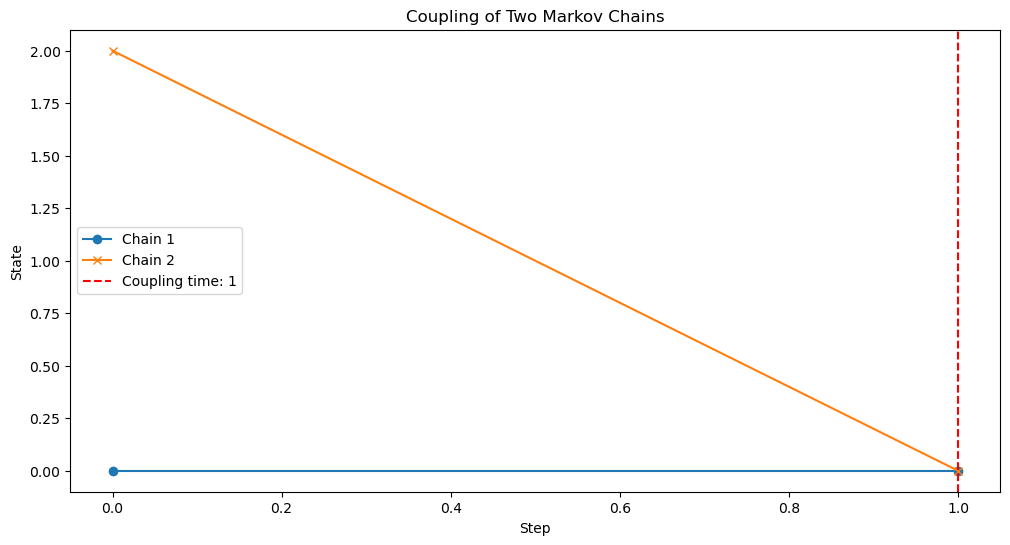

Coupling time: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple Markov chain with a transition matrix
# This example uses a 3-state Markov chain with the following transition matrix:
P = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.5, 0.3],
              [0.3, 0.2, 0.5]])

# Stationary distribution (for validation)
pi = np.array([1/3, 1/3, 1/3])  # Uniform stationary distribution for this case

# Function to generate a random next state based on the current state and transition matrix
def step(state, P):
    return np.random.choice([0, 1, 2], p=P[state])

# Simulate a single chain
def simulate_chain(P, start_state, n_steps):
    chain = [start_state]
    for _ in range(n_steps):
        chain.append(step(chain[-1], P))
    return chain

# Coupling function: two chains starting from different states
def coupling(P, start_state1, start_state2, n_steps):
    chain1 = [start_state1]
    chain2 = [start_state2]
    
    for i in range(n_steps):
        # Step forward for both chains
        state1 = step(chain1[-1], P)
        state2 = step(chain2[-1], P)
        
        # Add states to the chains
        chain1.append(state1)
        chain2.append(state2)
        
        # Check if both chains have met (i.e., reached the same state)
        if state1 == state2:
            return chain1, chain2, i + 1  # Return chains and coupling time
    
    return chain1, chain2, n_steps  # Return chains and the time after maximum steps

# Simulate the coupling process
n_steps = 1000
start_state1 = 0  # Start state for chain 1
start_state2 = 2  # Start state for chain 2

chain1, chain2, coupling_time = coupling(P, start_state1, start_state2, n_steps)

# Plot the chains
plt.figure(figsize=(12, 6))
plt.plot(chain1, label="Chain 1", linestyle='-', marker='o')
plt.plot(chain2, label="Chain 2", linestyle='-', marker='x')
plt.axvline(x=coupling_time, color='red', linestyle='--', label=f"Coupling time: {coupling_time}")
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Coupling of Two Markov Chains')
plt.legend()
plt.show()

# Output the coupling time
print(f"Coupling time: {coupling_time}")


In [2]:
import random

# Define a simple Markov chain with a transition matrix
# Transition matrix for a 3-state Markov chain
P = [
    [0.5, 0.3, 0.2],  # Transitions from state 0
    [0.2, 0.5, 0.3],  # Transitions from state 1
    [0.3, 0.2, 0.5],  # Transitions from state 2
]

# Function to generate a random next state based on the current state and transition matrix
def step(state, P):
    # Select next state based on the current state and transition probabilities
    return random.choices([0, 1, 2], weights=P[state])[0]

# Simulate a single chain
def simulate_chain(P, start_state, n_steps):
    chain = [start_state]
    for _ in range(n_steps):
        chain.append(step(chain[-1], P))
    return chain

# Coupling function: two chains starting from different states
def coupling(P, start_state1, start_state2, n_steps):
    chain1 = [start_state1]
    chain2 = [start_state2]
    
    for i in range(n_steps):
        # Step forward for both chains
        state1 = step(chain1[-1], P)
        state2 = step(chain2[-1], P)
        
        # Add states to the chains
        chain1.append(state1)
        chain2.append(state2)
        
        # Check if both chains have met (i.e., reached the same state)
        if state1 == state2:
            return chain1, chain2, i + 1  # Return chains and coupling time
    
    return chain1, chain2, n_steps  # Return chains and the time after maximum steps

# Simulate the coupling process
n_steps = 1000
start_state1 = 0  # Start state for chain 1
start_state2 = 2  # Start state for chain 2

chain1, chain2, coupling_time = coupling(P, start_state1, start_state2, n_steps)

# Print the first 50 steps for visualization
print("Chain 1:", chain1[:50])
print("Chain 2:", chain2[:50])

# Output the coupling time
print(f"Coupling time: {coupling_time}")


Chain 1: [0, 1, 2]
Chain 2: [2, 2, 2]
Coupling time: 2


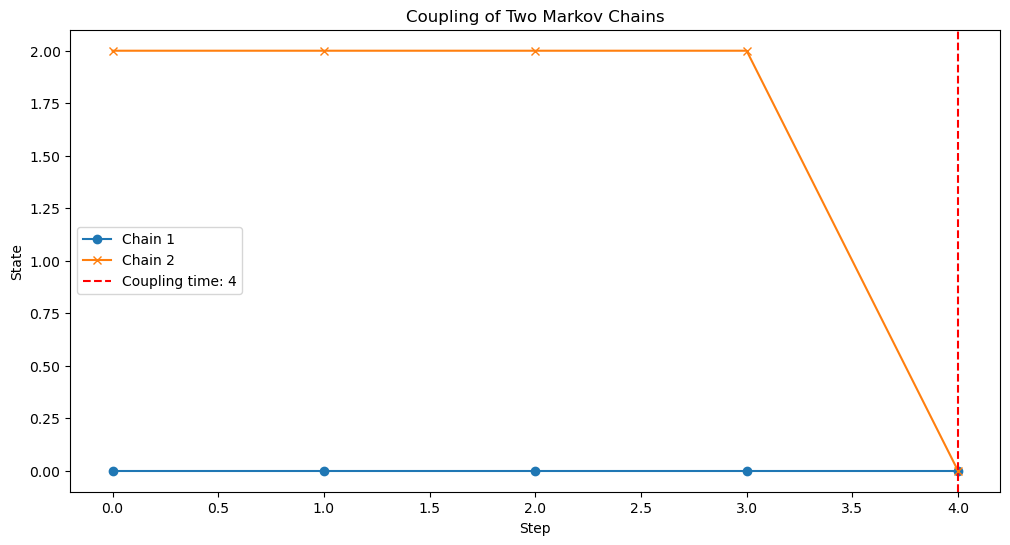

Coupling time: 4


In [3]:
import random
import matplotlib.pyplot as plt

# Define a simple Markov chain with a transition matrix
# Transition matrix for a 3-state Markov chain
P = [
    [0.5, 0.3, 0.2],  # Transitions from state 0
    [0.2, 0.5, 0.3],  # Transitions from state 1
    [0.3, 0.2, 0.5],  # Transitions from state 2
]

# Function to generate a random next state based on the current state and transition matrix
def step(state, P):
    # Select next state based on the current state and transition probabilities
    return random.choices([0, 1, 2], weights=P[state])[0]

# Simulate a single chain
def simulate_chain(P, start_state, n_steps):
    chain = [start_state]
    for _ in range(n_steps):
        chain.append(step(chain[-1], P))
    return chain

# Coupling function: two chains starting from different states
def coupling(P, start_state1, start_state2, n_steps):
    chain1 = [start_state1]
    chain2 = [start_state2]
    
    for i in range(n_steps):
        # Step forward for both chains
        state1 = step(chain1[-1], P)
        state2 = step(chain2[-1], P)
        
        # Add states to the chains
        chain1.append(state1)
        chain2.append(state2)
        
        # Check if both chains have met (i.e., reached the same state)
        if state1 == state2:
            return chain1, chain2, i + 1  # Return chains and coupling time
    
    return chain1, chain2, n_steps  # Return chains and the time after maximum steps

# Simulate the coupling process
n_steps = 1000
start_state1 = 0  # Start state for chain 1
start_state2 = 2  # Start state for chain 2

chain1, chain2, coupling_time = coupling(P, start_state1, start_state2, n_steps)

# Plot the chains
plt.figure(figsize=(12, 6))
plt.plot(chain1, label="Chain 1", linestyle='-', marker='o')
plt.plot(chain2, label="Chain 2", linestyle='-', marker='x')
plt.axvline(x=coupling_time, color='red', linestyle='--', label=f"Coupling time: {coupling_time}")
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Coupling of Two Markov Chains')
plt.legend()
plt.show()

# Output the coupling time
print(f"Coupling time: {coupling_time}")


### Theorem 50
For a positive recurrent aperiodic Markov chain on a countable space, for every initial state,

$$
\lim_{n \to \infty} \| K^n(x, \cdot) - \pi(\cdot) \|_{\text{TV}} = 0
$$

#### Proof:
Since $(X)$ is positive recurrent, $E_a[T_a] < \infty$ by Theorem 37. Therefore, $m_\pi$ is finite, and equation (6.25) holds, meaning every atom is ergodic. The result follows from Proposition 6.48.

For general state-spaces $X$, Harris recurrence is necessary in the derivation of the convergence of $K^n$ to $\pi$. Note that another characterization of Harris recurrence is the convergence of:

$$
\| K^n(x, \cdot) - \pi(\cdot) \|_{\text{TV}} \to 0
$$

for every value of $x$, instead of almost every value.

### Theorem 6.51
If $(X_n)$ is Harris positive and aperiodic, then

$$
\lim_{n \to \infty} \| K^n(x, \cdot) - \pi(\cdot) \|_{\text{TV}} = 0
$$

for every initial distribution $p$.

This result follows from an extension of the denumerable case to strongly aperiodic Harris positive chains by splitting, since these chains always allow for small sets (see Section 6.3.3). Based on an equivalent to the "first entrance and last exit" formula (6.23), it is then possible to move to arbitrary chains by the following result.

### Proposition 6.52
If $\pi$ is an invariant distribution for $P$, then:

$$
\pi(x) = \lim_{n \to \infty} K^n(x, \cdot)
$$

#### Proof:
First, note the equivalent definition of the norm (Problem 6.40):

$$
\| K^n(x, \cdot) - \pi(\cdot) \|_{\text{TV}} = \sup_{A \subset X} \left| \int_A K^n(x, dy) - \pi(dy) \right|
$$

We then have:

$$
\| K^{n+1}(x, \cdot) - \pi(\cdot) \|_{\text{TV}} = \sup_{A \subset X} \left| \int_A K^{n+1}(x, dy) - \pi(dy) \right|
$$

Using this formulation:

$$
= \sup_{A \subset X} \left| \int_X \left( K^n(x, dw) K(w, du) \right) - \pi(du) \right|
$$

Thus, we get the result as a decreasing sequence.
Since, by definition, $ K^{n+1}(x, dy) = \int K^n(x, dw) K(w, dy) $, and by the invariance of $\pi$, we have $ \pi(dy) = \int K(w, dy) \pi(dw) $. Regrouping terms, we can write:

$$
\| K^{n+1}(x, \cdot) \pi(dy) - \pi(dy) \|_{\text{TV}} 
= \sup_{A \subset X} \left| \int_A \left[ \int K(w, dy) \right] K^n(x, dw) \mu(dx) - \int_A \left[ \int K(w, dy) \right] \pi(dw) \right|
$$

This can be simplified to:

$$
\sup | h(w) K^n(x, dw) \mu(dx) - \int h(w) \pi(dw) |
$$

where the inequality follows from the fact that the quantity in the square brackets is a function with norm less than 1. Hence, monotonicity of the total variation norm is established.

Note that the equivalence (6.26) also implies the convergence:

$$
\lim_{n \to \infty} \mathbb{E}_\mu[h(X_n)] - \mathbb{E}_\mu[h(X)] = 0
$$

for every bounded function $h$. This equivalence is, in fact, often taken as the defining condition for the convergence of distributions (see, for example, Billingsley 1995, Theorem 25.8). We can, however, conclude (6.27) from a slightly weaker set of assumptions, where we do not need the full force of Harris recurrence (see Theorem 6.80 for an example).

The extension of (6.27) to more general functions $h$ is called **h-ergodicity** by Meyn and Tweedie (1993, pp. 342–344).

### Theorem 6.53
Let $(X_n)$ be positive, recurrent, and aperiodic.

1. **(a)** If $ \mathbb{E}_\mu[h(X)] = \infty $, then $ \mathbb{E}_x[|h(X_n)|] \to \infty $ for every $x$.

2. **(b)** If $ h(x) \in L_1(\mu) $, then

$$
\limsup_{n \to \infty} \| \mathbb{E}_x[h(X_n)] - \mathbb{E}_\pi[h(X)] \| = 0
$$

on all small sets $A(x)$, where $ |A(x)| \to 0 $.

Similar conditions appear as necessary conditions for the **Central Limit Theorem** (see (6.31) in Theorem 6.64). Condition (6.29) relates to a coupling argument, in the sense that the influence of the initial condition vanishes "fast enough," as in the proof of Theorem 6.63.

###  Geometric Convergence

The convergence in equation (6.28) of the expectation of $ h(x) $ at time $ n $ to the expectation of $ h(x) $ under the stationary distribution ensures the proper behavior of the chain $ (X) $ whatever the initial value $ X_0 $ (or its distribution). A more precise description of the convergence properties involves the study of the speed of convergence of $ K^n $ to $ \pi $. An evaluation of this speed is important for Markov chain Monte Carlo algorithms in the sense that it relates to stopping rules for these algorithms; minimal convergence speed is also a requirement for the application of the **Central Limit Theorem**.

To study the speed of convergence more closely, we first introduce an extension of the total variation norm, denoted by $ \| \cdot \|_A $, which allows for an upper bound other than 1 on the functions. The generalization is defined by:

$$
\| K^n(x, \cdot) \|_A = \sup_{f \in \mathcal{F}} \left| \int f(x) K^n(x, dz) \right|
$$

#### Definition 6.54
A chain $ (X_n) $ is **geometrically h-ergodic**, with $ h \geq 1 $ on $ X $, if:

- $ (X_n) $ is Harris positive, with stationary distribution $ \pi $,
- $ \mathbb{E}_\pi[h] < \infty $,
- and there exists $ r > 1 $ such that:

$$
\sum_{n=1}^\infty \| K^n(x, \cdot) - \pi(\cdot) \|_A \leq \frac{C}{r^n}
$$

for some constant $ C > 0 $ and for all $ x \in X $. The case \( h = 1 \) corresponds to the geometric ergodicity of \( (X_n) \).

**Geometric h-ergodicity** means that \( \| K^n(x, \cdot) - \pi(\cdot) \|_A \) is decreasing at least at a geometric speed. This is because (6.30) implies:

$$
\| K^n(x, \cdot) - \pi(\cdot) \|_A \leq M r^{-n}
$$

where $ M $ is some constant.

If $ (X_n) $ has an atom $ a $, then (6.30) implies that for a real number $ r > 1 $:

$$
\sum_{n=1}^\infty \mathbb{P}_x(X_n \in \alpha) r^n < \infty \quad \text{and} \quad \mathbb{P}_x(X_n \in \alpha) r^n < \infty
$$

The series associated with $ \mathbb{P}_a(X_n \in \alpha) $ converges outside of the unit circle if the power series associated with $ \mathbb{P}_a(T_a) $ converges for values of $ r $ strictly larger than 1. (The proof of this result, called **Kendall's Theorem**, is based on the renewal equations established in the proof of Proposition 6.31.) This equivalence justifies the following definition.


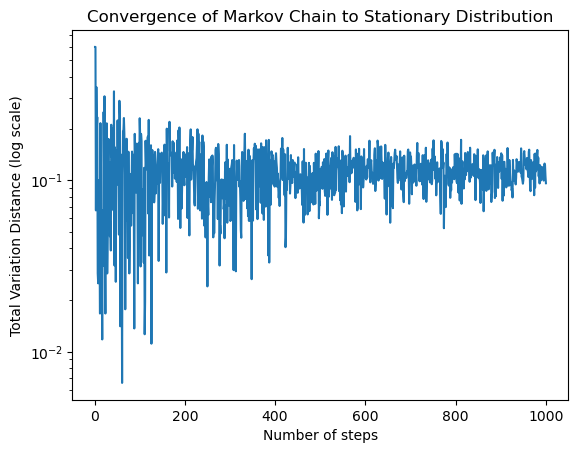

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Transition matrix (example: a 3-state chain)
# States: 0, 1, 2
# Transition matrix P = [[0.5, 0.5, 0.0], [0.2, 0.8, 0.0], [0.0, 0.0, 1.0]]
P = [
    [0.5, 0.5, 0.0],
    [0.2, 0.8, 0.0],
    [0.0, 0.0, 1.0]
]

# Stationary distribution (for this chain, it should converge to [0.4, 0.6, 0.0])
pi = [0.4, 0.6, 0.0]

# Function to simulate the next state based on the current state
def next_state(current_state):
    return random.choices([0, 1, 2], P[current_state])[0]

# Function to calculate the total variation distance
def total_variation_distance(p1, p2):
    return 0.5 * sum(abs(p1[i] - p2[i]) for i in range(len(p1)))

# Simulate the Markov chain
def simulate_markov_chain(initial_state, num_steps):
    current_state = initial_state
    state_counts = [0] * len(P)  # Count of visits to each state

    for _ in range(num_steps):
        state_counts[current_state] += 1
        current_state = next_state(current_state)

    # Calculate the empirical distribution
    empirical_dist = [count / num_steps for count in state_counts]
    return empirical_dist

# Function to simulate the convergence of the chain to the stationary distribution
def simulate_convergence(initial_state, num_steps, pi):
    distances = []
    for n in range(1, num_steps + 1):
        empirical_dist = simulate_markov_chain(initial_state, n)
        dist = total_variation_distance(empirical_dist, pi)
        distances.append(dist)
    return distances

# Run the simulation
initial_state = 0  # Starting state (can be any state, 0, 1, or 2)
num_steps = 1000   # Total steps in the chain
distances = simulate_convergence(initial_state, num_steps, pi)

# Plot the results
plt.plot(range(1, num_steps + 1), distances)
plt.yscale('log')  # Use log scale to better visualize geometric decay
plt.xlabel('Number of steps')
plt.ylabel('Total Variation Distance (log scale)')
plt.title('Convergence of Markov Chain to Stationary Distribution')
plt.show()


# Geometric and Uniform Ergodicity in Markov Chains

## Definition 55: Geometrically Ergodic and Kendall Atom

An **accessible atom** $ a $ is **geometrically ergodic** if there exists $ r > 1 $ such that:

$$
\sum_{n=1}^\infty \| K^n(a, a) - \pi(a) \| r^n < \infty
$$

and $ a $ is a **Kendall atom** if there exists $ r > 1 $ such that:

$$
B_\pi[a] < \infty.
$$

If $ a $ is a Kendall atom, it is thus geometrically ergodic and ensures geometric ergodicity for $ (X_n) $.

---

## Theorem 56: Geometric Ergodicity via a Geometrically Ergodic Atom

If $ (X_n) $ is $ \pi $-irreducible, with invariant distribution $ \pi $, and if there exists a geometrically ergodic atom $ a $, then there exist $ r > 1 $, $ K > 1 $, and $ R < \infty $ such that, for almost every $ x \in \mathcal{X} $,

$$
\sum_{n=1}^\infty \| K^n(x, \cdot) - \pi \|_{\text{TV}} < R E_x[\kappa] < \infty.
$$

---

## Example 57: Non-Geometric Returns to 0

Consider a Markov chain on $ \mathbb{Z} $, with transition matrix $ P = (P_{ij}) $ such that:

$$
P_{i,i+1} = \beta, \quad P_{i,i-1} = 1 - \beta, \quad P_{i,j} = 0 \quad \text{for } j \notin \{i-1, i+1\}.
$$

Meyn and Tweedie (1993, p. 361) consider the return time to 0, $ T_0 $, with mean:

$$
E_0[T_0] = \sum_{j=1}^\infty \frac{1}{(1-\beta)^j + \beta^j}.
$$

The state 0 is thus an ergodic atom when all the $ \beta_j $'s are positive (yielding irreducibility) and:

$$
\sum_{j=1}^\infty (1 - \beta_j)^j < \infty.
$$

Now, for $ r > 0 $:

$$
E_0[r^{T_0}] = r \sum_{j=1}^\infty r^j \beta^j (1 - \beta)^j.
$$

For $ r > 1 $, if $ \beta_j \to 1 $ as $ j \to \infty $, the series in the above expectation always diverges for $ j $ large enough. Thus, the chain is **not geometrically ergodic**.

---

## Section 6.6.3: Uniform Ergodicity

The property of **uniform ergodicity** is stronger than geometric ergodicity in the sense that the rate of geometric convergence must be uniform over the whole space. It is used in the Central Limit Theorem (Section 6.7).

## Definition 58: Uniform Ergodicity

A Markov chain $ (X_n) $ is **uniformly ergodic** if:

$$
\lim_{n \to \infty} \sup_{x \in \mathcal{X}} \| K^n(x, \cdot) - \pi \|_{\text{TV}} = 0.
$$

Uniform ergodicity can be established through one of the following equivalent properties:

---

## Theorem 59: Equivalent Conditions for Uniform Ergodicity

The following conditions are equivalent:

1. $ (X_n) $ is uniformly ergodic.

2. There exist constants $ R < \infty $ and $ r > 1 $ such that:

   $$
   \| K^n(x, \cdot) - \pi \|_{\text{TV}} \leq R r^{-n},
   $$

   for all $ x \in \mathcal{X} $.

3. $ (X_n) $ is aperiodic, and $ \mathcal{X} $ is a small set.

4. $ (X_n) $ is aperiodic, and there exist a small set $ C \subseteq \mathcal{X} $ and $ r > 1 $ such that:

   $$
   \sup_{x \in C} E_x[r^{T_C}] < \infty,
   $$

   where $ T_C $ is the first return time to $ C $.

---

### Doeblin's Condition

If the whole space $ \mathcal{X} $ is small, there exists a probability distribution $ \nu $ on $ \mathcal{X} $, and constants $ \epsilon > 0 $, $ \delta > 0 $, and $ n $ such that, if $ \nu(A) > \epsilon $, then:

$$
\inf_{x \in \mathcal{X}} K^n(x, A) \geq \delta.
$$

This property is sometimes called **Doeblin's condition**. It demonstrates the strength of uniform ergodicity and suggests challenges in its verification.

---

### Finite Case and Uniform Ergodicity

In the finite state space case, uniform ergodicity can be derived from the smallness of $ \mathcal{X} $. Specifically, the condition:

$$
\inf_{x \in \mathcal{X}} P(x, x) \geq \epsilon,
$$

for every $ x \in \mathcal{X} $, leads to the choice of the minorizing measure $ \nu $ as:

$$
\nu(y) = \sum_{x \in \mathcal{X}} P(x, y),
$$

as long as $ P(x, y) > 0 $ for some $ y \in \mathcal{X} $.

If $ (X_n) $ is recurrent and aperiodic, this positivity condition can be attained by considering a subchain $ (Y_m) = (X_{nd}) $ for $ d $ large enough. For more details, see Meyn and Tweedie (1993), Chapter 16.

---

## Section 6.7: Limit Theorems

Although the notions and results introduced in the previous sections are critical in justifying Markov chain Monte Carlo (MCMC) algorithms, the following...

## Chapter 7: Limit Theorems

## Introduction

The results in this section are essential for understanding the practical application of Markov chain Monte Carlo (MCMC) algorithms. While the convergence results (ergodicity) discussed in Section 6.6 focus on the behavior of the Markov chain $ (X_n) $ at a specific time $ n $, these properties provide only a partial justification for simulation methods. What truly matters in practice is the behavior of the observed sample path $ \{X_0, X_1, \dots, X_n\} $, often referred to as "sample path" properties (Meyn and Tweedie, 1993).

---

## Probabilistic vs. Statistical Analysis

There is a fundamental distinction between:

- **Probabilistic Analysis**: Describes the average behavior of samples based on theoretical models.
- **Statistical Inference**: Involves reasoning based on the observed sample, conditional on the realization.

This distinction, highlighted in Robert (2001, Chapters 1 and 11), emphasizes the Bayesian approach or the Likelihood Principle (e.g., Berger and Wolpert, 1988). In the context of Markov chains, we use probabilistic convergence results to verify the convergence of functions of the observed sample path.

### Challenges in Direct Application

Classical convergence theorems (e.g., Law of Large Numbers, Central Limit Theorem) face challenges due to:

1. **Markovian Dependence**: Observations $ X_n $ are not independent.
2. **Non-Stationarity**: Unless $ X_0 $ is sampled from the stationary distribution, the sequence is non-stationary.

For non-stationary chains, the convergence behavior must account for the initial state $ X_0 $.

---

## Ergodic Theorems

To address non-stationary chains, we first present results equivalent to the Law of Large Numbers, often referred to as **ergodic theorems**. These results establish the convergence of averages computed from the observed sample path.

Let $ f $ be a function such that $\mathbb{E}_\pi[|f(X)|] < \infty $, where $ \pi $ is the stationary distribution. Then, for a Markov chain $ (X_n) $ started at $ X_0 $, the ergodic theorem states:

$$
\frac{1}{n} \sum_{k=1}^n f(X_k) \xrightarrow{a.s.} \mathbb{E}_\pi[f(X)],
$$

as $ n \to \infty $.

---

## Central Limit Theorem (CLT)

The Central Limit Theorem (CLT) for Markov chains provides conditions under which the scaled sum of $ f(X_n) $ converges in distribution to a normal random variable. Specifically, if $ (X_n) $ is positive recurrent and $ f $ satisfies certain regularity conditions:

$$
\sqrt{n} \left( \frac{1}{n} \sum_{k=1}^n f(X_k) - \mathbb{E}_\pi[f(X)] \right) \xrightarrow{d} N(0, \sigma^2),
$$

where $ \sigma^2 $ depends on both $ f $ and the chain's transition structure.

### Practical Challenges

- Verifying the assumptions of the CLT is often non-trivial, especially in the MCMC context.
- Dependencies and non-stationarity complicate the analysis.

---

## Perfect Simulation

While rare, certain MCMC methods ensure that $ X_0 $ is sampled directly from the stationary distribution, resulting in a stationary chain from the outset. These methods, often referred to as **perfect simulation**, are discussed in detail in Chapter 13.

---


Simulated Markov Chain: [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1] ...
Stationary Expectation: 0.33333333333333326
Final Time Average: 0.2937062937062937


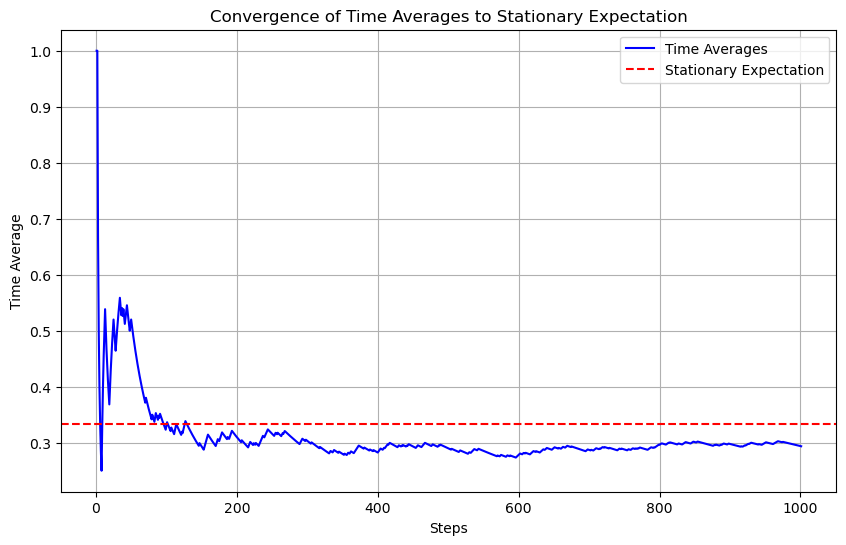

In [6]:
import random

# Define the Markov chain transition matrix and state space
states = [0, 1]
transition_matrix = {
    0: {0: 0.8, 1: 0.2},  # Probabilities for state 0
    1: {0: 0.4, 1: 0.6},  # Probabilities for state 1
}

def markov_chain_simulation(start_state, num_steps):
    """Simulates a Markov chain for a given number of steps."""
    state = start_state
    chain = [state]
    for _ in range(num_steps):
        next_state = random.choices(
            states, weights=[transition_matrix[state][s] for s in states]
        )[0]
        chain.append(next_state)
        state = next_state
    return chain

def stationary_distribution():
    """Computes the stationary distribution analytically for a simple chain."""
    # Solve the stationary equations πP = π
    # For the given 2-state chain, we solve:
    # π_0 * P[0][0] + π_1 * P[1][0] = π_0
    # π_0 * P[0][1] + π_1 * P[1][1] = π_1
    # π_0 + π_1 = 1
    
    p00, p01 = transition_matrix[0][0], transition_matrix[0][1]
    p10, p11 = transition_matrix[1][0], transition_matrix[1][1]

    # π_0 = π_1 * P[1][0] / (1 - P[0][0])
    pi_1 = 1 / (1 + (p10 / (1 - p00)))
    pi_0 = 1 - pi_1

    return {0: pi_0, 1: pi_1}

def ergodic_theorem_simulation(num_steps, function=lambda x: x):
    """Simulates and verifies the ergodic theorem for a given function."""
    start_state = random.choice(states)
    chain = markov_chain_simulation(start_state, num_steps)
    
    # Compute time averages
    time_averages = []
    cumulative_sum = 0
    for t, state in enumerate(chain, start=1):
        cumulative_sum += function(state)
        time_averages.append(cumulative_sum / t)

    # Stationary expectation
    stationary_dist = stationary_distribution()
    stationary_expectation = sum(stationary_dist[s] * function(s) for s in states)

    return chain, time_averages, stationary_expectation

# Parameters
num_steps = 1000
function = lambda x: x  # Function h(x) = x for demonstration

# Run the simulation
chain, time_averages, stationary_expectation = ergodic_theorem_simulation(num_steps, function)

# Output the results
print("Simulated Markov Chain:", chain[:20], "...")
print("Stationary Expectation:", stationary_expectation)
print("Final Time Average:", time_averages[-1])

# Plot the convergence
import matplotlib.pyplot as plt

# Ensure the length of time_averages matches the number of steps
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_averages) + 1), time_averages, label="Time Averages", color="blue")
plt.axhline(y=stationary_expectation, color="red", linestyle="--", label="Stationary Expectation")
plt.xlabel("Steps")
plt.ylabel("Time Average")
plt.title("Convergence of Time Averages to Stationary Expectation")
plt.legend()
plt.grid(True)
plt.show()


## Ergodic Theorems

Given observations $ X_1, \dots, X_n $ of a Markov chain, we now examine the limiting behavior of the partial sums:

$$
S_n(h) = \sum_{i=1}^n h(X_i)
$$

when $ n $ goes to infinity. This connects back to the i.i.d. case through renewal when $ (X_n) $ has an atom. Consider first the notion of harmonic functions, which is related to ergodicity for Harris recurrent Markov chains.

### Definition 60
A measurable function $ h $ is **harmonic** for the chain $ (X_n) $ if:

$$
\mathbb{E}[h(X_{n+1}) \mid X_n] = h(X_n).
$$

These functions are invariant for the transition kernel (in the functional sense) and they characterize Harris recurrence as follows.

### Proposition 61
For a positive Markov chain, if the only bounded harmonic functions are the constant functions, the chain is Harris recurrent.

#### Proof
First, the probability of an infinite number of returns to $ A $, denoted as $ Q(x, A) = \mathbb{P}(\tau_A = \infty) $, where $ \tau_A $ is the return time to $ A $, can be expressed as a harmonic function. Specifically:

$$
h(x) = Q(x, A),
$$

where $ Q(x, A) $ satisfies:

$$
\mathbb{E}_x[h(X_1)] = \mathbb{E}_x[\mathbb{P}_x(\tau_A = \infty)] = \mathbb{P}_x(\tau_A = \infty),
$$

which implies $ Q(x, A) $ is constant in $ x $.

#### Tail Event Argument

The function $ Q(x, A) $ describes a tail event, i.e., an event whose occurrence does not depend on $ X_1, X_2, \dots, X_m $ for any finite $ m $. Tail events typically satisfy a $ 0\text{-}1 $ law, meaning their probabilities are either $ 0 $ or $ 1 $. While $ 0\text{-}1 $ laws are commonly established in the i.i.d. case (e.g., the Hewitt-Savage $ 0\text{-}1 $ Law; see Billingsley, 1995, Section 36), extensions to Markov chains are nontrivial and beyond our scope here.

#### Continuation of Proof

Assuming the $ 0\text{-}1 $ law holds for $ Q(x, A) $:

- If $ \pi(A) > 0 $, where $ \pi $ is the invariant measure, $ Q(x, A) = 0 $ is impossible. 
- If $ Q(x, A) = 0 $, then the chain almost surely visits $ A $ only a finite number of times. Consequently, the average:

$$
\frac{1}{N} \sum_{i=1}^N \mathbf{1}_{X_i \in A}
$$

will not converge to $ \pi(A) $, contradicting the Law of Large Numbers (Theorem 6.63).

Thus, for any $ x $, $ Q(x, A) = 1 $, establishing that the chain is Harris recurrent.

## Proposition 61: Continuity of the Transition Functional

Proposition .61 can be interpreted as a **continuity property** of the transition functional:

$$
K h(x) = \mathbb{E}_x[h(X_1)],
$$

in the following sense:  
By induction, a harmonic function $ h $ satisfies:

$$
h(x) = \mathbb{E}_x[h(X_n)],
$$

and by Theorem 53, $ h(x) $ is almost surely equal to $ \mathbb{E}[h(X)] $, which implies that $ h(x) $ is constant almost everywhere. For Harris recurrent chains, Proposition 61 strengthens this result to show that $ h(x) $ is constant everywhere.  

(Feller 1971, pp. 265–267, develops a related approach to ergodicity, replacing Harris recurrence with a regularity constraint on the kernel.)

Proposition 61 is particularly useful for proving the Harris recurrence of certain Markov Chain Monte Carlo algorithms. Furthermore, the behavior of bounded harmonic functions fully characterizes Harris recurrence. The converse of Proposition 6.61 is also true, stated as Lemma 6.62.

### Lemma 62
For Harris recurrent Markov chains, **constants are the only bounded harmonic functions**.

#### Consequence
If $ (X_n) $ is Harris positive with stationary distribution $ \pi $, and if $ S_n(h) $ converges $ \mu_0 $-almost surely (where $ \mu_0 $ is the initial distribution) to:

$$
\int h(x) \pi(dx),
$$

this convergence occurs for **every initial distribution** $ \mu $.  
The convergence probability:

$$
P_\mu \left( S_n(h) \to \mathbb{E}[h] \right),
$$

is harmonic. Hence, Harris recurrence provides a robust form of stability where almost sure convergence generalizes to convergence for all starting points.

### Theorem 63: Ergodic Theorem

If $ (X_n) $ has a $ \sigma $-finite invariant measure $ \pi $, the following statements are equivalent:

1. For $ f, g \in L^1(X, \pi) $ with $ g(x) \geq 0 $ and $ \int g(x) \pi(dx) > 0 $:

$$
\lim_{n \to \infty} \frac{S_n(f)}{S_n(g)} = \frac{\int f(x) \pi(dx)}{\int g(x) \pi(dx)}, \quad \text{almost surely.}
$$

2. The Markov chain $ (X_n) $ is Harris recurrent.

## Proof of Theorem 63

### Step 1: If (i) holds, establish Harris recurrence

Let $ f $ be the indicator function of a set $ A $ with finite measure $ \pi(A) > 0 $, and $ g $ be any function with finite and positive integral. From (i), we have:

$$
\lim_{n \to \infty} \frac{S_n(f)}{S_n(g)} = \frac{\int f(x) \pi(dx)}{\int g(x) \pi(dx)}, \quad \text{almost surely.}
$$

If $ \pi(A) > 0 $, this implies:

$$
P(X_n \in A \text{ infinitely often}) = 1,
$$

for every initial point $ X_0 = x $. Hence, $ (X_n) $ is Harris recurrent.

---

### Step 2: If (ii) holds, reduce to the atomic case
Assume Harris recurrence. Using a splitting argument, consider an atom $ a $ of the Markov chain. Let $ T_a^{(k)} $ be the time of the $ (k+1) $-th visit to $ a $, and let $ N_t(a) $ be the number of visits to $ a $ by time $ t $. The bounds for the partial sums are given by:

$$
\sum_{k=1}^{N_t(a) - 1} S_{T_a^{(k)}}(f) \leq S_t(f) \leq \sum_{k=0}^{N_t(a)} S_{T_a^{(k)}}(f).
$$

---

### Step 3: Decompose into i.i.d. blocks
For each $ k $, define the block sums:

$$
S_{T_a^{(k+1)}}(f) = \sum_{j=T_a^{(k)} + 1}^{T_a^{(k+1)}} f(X_j).
$$

These blocks are **independent and identically distributed** (i.i.d.) because they depend only on the chain's behavior between visits to the atom $ a $. Applying the **Strong Law of Large Numbers** (SLLN) for i.i.d. random variables, we have:

$$
\frac{1}{N_t(a)} \sum_{k=1}^{N_t(a)} S_{T_a^{(k)}}(f) \to \mathbb{E}_\pi[S_{T_a^{(k)}}(f)], \quad \text{almost surely.}
$$

Combining this with bounds on $ N_t(a) $ and the SLLN, we establish:

$$
\frac{S_t(f)}{t} \to \int f(x) \pi(dx), \quad \text{almost surely.}
$$

---

### Important Note
The measure $ \pi $ does not need to be a probability measure. Thus, the theorem holds even if the chain is **null recurrent**. In the context of Markov Chain Monte Carlo (MCMC), this result is sometimes used to justify the use of improper posterior distributions, though its practical relevance is debated (see Section 10.4.3).

---

##  Central Limit Theorems (CLTs)

The progression from the **Law of Large Numbers (LLN)** to the **Central Limit Theorem (CLT)** is natural. The proof of Theorem 6.63 suggests an extension of the CLT for i.i.d. random variables to Markov chains. However, this extension requires additional conditions, as the variance depends explicitly on the atom $ a $ of the split chain. 

We now present alternative conditions for the CLT to hold under different settings.


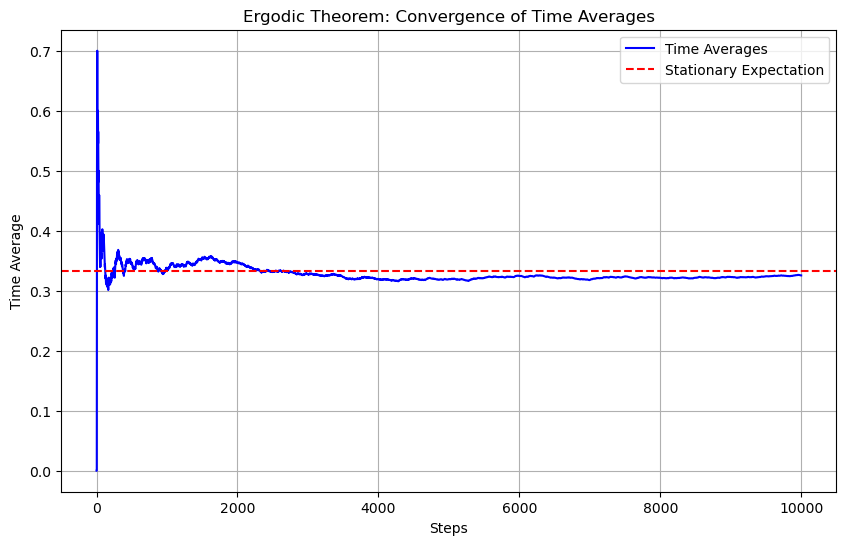

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix for the Markov chain
transition_matrix = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

# Define the state space
state_space = np.array([0, 1])

# Define the function h(x)
def h(x):
    return x  # Here, h(x) = x for simplicity

# Simulate the Markov chain
def simulate_markov_chain(num_steps, initial_state, transition_matrix):
    states = [initial_state]
    current_state = initial_state

    for _ in range(num_steps - 1):
        current_state = np.random.choice(
            state_space, p=transition_matrix[current_state]
        )
        states.append(current_state)

    return np.array(states)

# Parameters
num_steps = 10000
initial_state = 0

# Simulate the Markov chain
chain = simulate_markov_chain(num_steps, initial_state, transition_matrix)

# Compute partial sums S_n(h) and averages
partial_sums = np.cumsum(h(chain))
time_averages = partial_sums / np.arange(1, num_steps + 1)

# The stationary distribution can be computed as the eigenvector of the transition matrix
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)].flatten()
stationary_distribution /= stationary_distribution.sum()

# Compute the stationary expectation of h
stationary_expectation = sum(h(state) * stationary_distribution[state] for state in state_space)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps + 1), time_averages, label="Time Averages", color="blue")
plt.axhline(y=stationary_expectation, color="red", linestyle="--", label="Stationary Expectation")
plt.xlabel("Steps")
plt.ylabel("Time Average")
plt.title("Ergodic Theorem: Convergence of Time Averages")
plt.legend()
plt.grid()
plt.show()


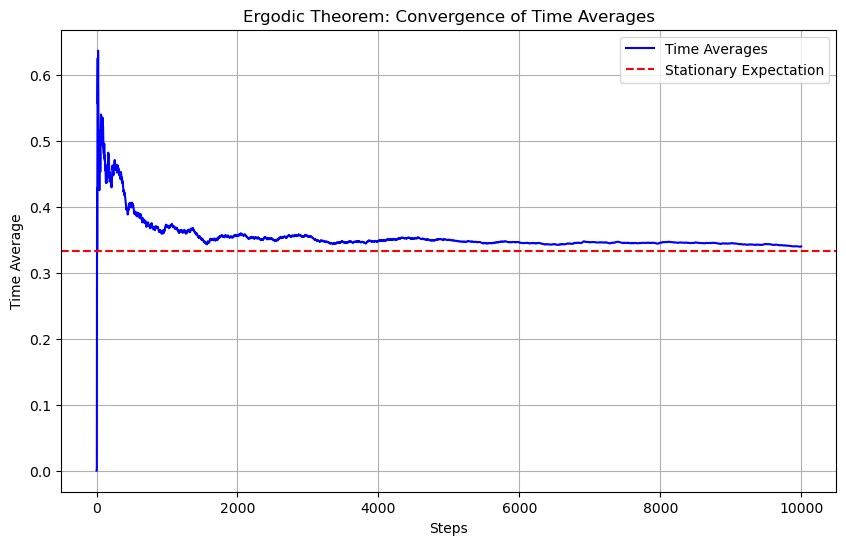

In [8]:
import random
import matplotlib.pyplot as plt

# Define the transition matrix for the Markov chain
transition_matrix = [
    [0.8, 0.2],
    [0.4, 0.6]
]

# Define the state space
state_space = [0, 1]

# Define the function h(x)
def h(x):
    return x  # Here, h(x) = x for simplicity

# Simulate the Markov chain
def simulate_markov_chain(num_steps, initial_state, transition_matrix):
    states = [initial_state]
    current_state = initial_state

    for _ in range(num_steps - 1):
        current_state = random.choices(
            state_space, transition_matrix[current_state]
        )[0]
        states.append(current_state)

    return states

# Parameters
num_steps = 10000
initial_state = 0

# Simulate the Markov chain
chain = simulate_markov_chain(num_steps, initial_state, transition_matrix)

# Compute partial sums S_n(h) and averages
partial_sums = [0] * num_steps
partial_sums[0] = h(chain[0])

for i in range(1, num_steps):
    partial_sums[i] = partial_sums[i-1] + h(chain[i])

time_averages = [partial_sums[i] / (i + 1) for i in range(num_steps)]

# Compute the stationary distribution
def compute_stationary_distribution(transition_matrix):
    # We solve for the stationary distribution by finding the eigenvector corresponding to eigenvalue 1
    # For simplicity, we use an iterative method to approximate the solution
    pi = [0.5, 0.5]  # Starting guess for the stationary distribution (uniform)
    tolerance = 1e-6
    max_iter = 1000
    for _ in range(max_iter):
        new_pi = [0, 0]
        for i in range(2):
            new_pi[i] = sum(transition_matrix[j][i] * pi[j] for j in range(2))
        # Normalize the new_pi to sum to 1
        norm = sum(new_pi)
        new_pi = [x / norm for x in new_pi]
        # Check for convergence
        if all(abs(new_pi[i] - pi[i]) < tolerance for i in range(2)):
            break
        pi = new_pi
    return pi

# Get stationary distribution
stationary_distribution = compute_stationary_distribution(transition_matrix)

# Compute the stationary expectation of h
stationary_expectation = sum(h(state) * stationary_distribution[state] for state in state_space)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps + 1), time_averages, label="Time Averages", color="blue")
plt.axhline(y=stationary_expectation, color="red", linestyle="--", label="Stationary Expectation")
plt.xlabel("Steps")
plt.ylabel("Time Average")
plt.title("Ergodic Theorem: Convergence of Time Averages")
plt.legend()
plt.grid()
plt.show()


##  The Discrete Case

The discrete case can be solved directly, as shown by Problems 6.50 and 6.51.

### Theorem 6.64
If $(X_n)$ is Harris positive with an atom $a$ such that  
$$
\pi(a) > 0, \quad \text{and} \quad \mathbb{E}_a[\tau_a^2] < \infty,
$$
where
$$
\mathbb{E}_a\left[\sum_{n=1}^\infty |h(X_n) - \mathbb{E}[h(X_n)]| \right] < \infty,
$$
then the Central Limit Theorem applies. That is,  
$$
\sqrt{N} \left(\frac{1}{N} \sum_{n=1}^N h(X_n) - \mathbb{E}[h]\right) \xrightarrow{d} N(0, \sigma^2),
$$
where $\sigma^2 = \lim_{N \to \infty} \frac{1}{N} \sum_{n=1}^N \text{Var}[h(X_n)]$.

### Proof
Using the same notation as in the proof of Theorem 63, if $h(x) = h(x) - \mathbb{E}[h]$, we have  
$$
\sqrt{N} \left(\frac{1}{N} \sum_{n=1}^N h(X_n)\right) = \sqrt{N} \left(\frac{1}{N} \sum_{n=1}^N S_n(a)\right),
$$
which follows from the Central Limit Theorem for the independent variables $S_n(a)$. Moreover, $N/N \to 1/\pi(a)$ almost surely as $N \to \infty$. 

Since  
$$
\sum_{n=1}^N S_n(a) - \sum_{n=1}^N h(X_n) = S_N(a) - S_0(a),
$$
and  
$$
\lim_{N \to \infty} \frac{S_N(a)^2}{N} = \mathbb{E}[S_0(a)^2],
$$
we get  
$$
\frac{S_N(a)}{\sqrt{N}} \to 0,
$$
and the remainder term goes to 0 almost surely.

---

This result indicates that extending the Central Limit Theorem to the nonatomic case is more delicate than for the Ergodic Theorem. Conditions $(6.31)$ are expressed in terms of the split chain $(X_n)$. (See Section 12.2.3 for an extension to cases when a small set exists.) In **Note 6.9.1**, alternative versions of the Central Limit Theorem involving a drift condition are presented.
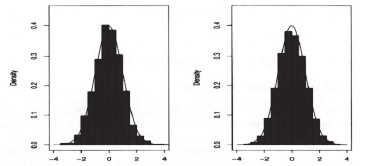

##  Reversibility

The following theorem avoids the verification of a drift condition but instead requires the Markov chain to be **reversible** (see Definition 6.44).  

With the assumption of reversibility, the Central Limit Theorem directly follows from the strict positivity of $\sigma^2$. This result was established by Kipnis and Varadhan (1986) using a proof that is beyond our scope.

### Theorem 65
If $(X_n)$ is aperiodic, irreducible, and reversible with invariant distribution $\pi$, the Central Limit Theorem applies when  
$$
0 \leq \mathbb{E}_\pi[g^2(X_0)] + 2 \sum_{n=1}^\infty \mathbb{E}_\pi[g(X_0) g(X_n)] < \infty.
$$

The main point here is that while reversibility is a restrictive assumption, it is often easy to impose in Markov chain Monte Carlo (MCMC) algorithms by introducing additional simulation steps (see Geyer 1992, Tierney 1994, Green 1995).  

See also **Theorem 77** for another version of the Central Limit Theorem, which relies on a "drift condition" (see **Note 6.9.1**) similar to geometric ergodicity.

---

### Example 66 (Continuation of Example 43)
For the AR(1) chain, the transition kernel corresponds to the $N(\phi X_n, \sigma^2)$ distribution, and the stationary distribution is $N(0, \sigma^2 / (1 - \phi^2))$.  

It is straightforward to verify that the chain is reversible by showing that (Problem 6.65):  
$$
X_{n+1} \sim N(0, \sigma^2), \quad \text{and} \quad (X_n, X_{n+1}) \sim N(\phi X_{n+1}, \sigma^2).
$$
Thus, the chain satisfies the conditions for the Central Limit Theorem (CLT).

---

### Figures

**Fig.2** shows histograms of means for the cases of $\phi = 0.5$ and $\phi = 2$:  
- In the first case (left panel), the chain is **positive recurrent** and satisfies the CLT conditions.  
- In the second case (right panel), $\phi = 2$, and the chain is **transient**. Interestingly, the histogram of the means "looks" well-behaved, giving no immediate indication that the chain does not converge.  

This observation highlights that **null recurrent** and **transient chains** can appear well-behaved graphically in their outputs, even though they do not converge.

---
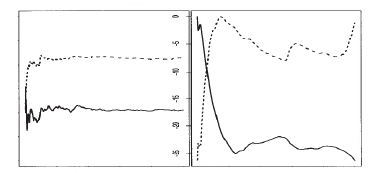
In **Fig.3**, we plot the trajectories of the cumulative mean and standard deviation for a chain of length 1000:  
- **Left panel**: $\phi = 0.5$, corresponding to the ergodic case.  
- **Right panel**: $\phi = 1.0001$, corresponding to the (barely) transient case.  

It is evident in the right panel that there is no convergence.  

For further insights, see **Section 10.4.3** regarding the manifestation of these behaviors in MCMC algorithms.
## Figures

### Figure 2
**Histogram of 2500 means (each based on 50 observations) from an AR(1) chain**:  
- **Left panel**: $\phi = 0.5$, resulting in an **ergodic chain**.  
- **Right panel**: $\phi = 2$, corresponding to a **transient chain**.

---

### Figure 3
**Trajectories of the mean (solid line) and standard deviation (dashed line) from the AR(1) process of Example 66**:  
- **Left panel**: $\phi = 0.5$, resulting in an **ergodic Markov chain**. The figure shows convergence of the mean and standard deviation.  
- **Right panel**: $\phi = 1.0001$, resulting in a **transient Markov chain**, which does not exhibit convergence.  

---

##  Geometric Ergodicity and Regeneration

Another approach to the Central Limit Theorem (CLT) for Markov chains relies on **geometric ergodicity**, a Liapounov-type moment condition on the function $h$, and a **regeneration argument**.  

Hobert et al. (2002), extending the work of Chan and Geyer (1994) (see **Problem 6.66**), provide specific conditions under which **Theorem 6.67** applies. These conditions ensure that the Liapounov condition is met, and a consistent estimate of $\sigma^2$ can be obtained.

---

### Theorem 67
If $(X_n)$ is aperiodic, irreducible, positive Harris recurrent with invariant distribution $\pi$, and **geometrically ergodic**, and if, in addition:
$$
\sup_x \mathbb{E}[h^p(X_1) \mid X_0 = x] < \infty,
$$
for some $p > 2$, then the Central Limit Theorem applies. Specifically,  
$$
\sqrt{N} \left( \frac{1}{N} \sum_{n=1}^N h(X_n) - \mathbb{E}_\pi[h] \right) \xrightarrow{d} N(0, \sigma^2),
$$
where $\sigma^2 = \text{Var}_\pi(h(X_1)) + 2 \sum_{k=1}^\infty \text{Cov}_\pi(h(X_1), h(X_{1+k})).$


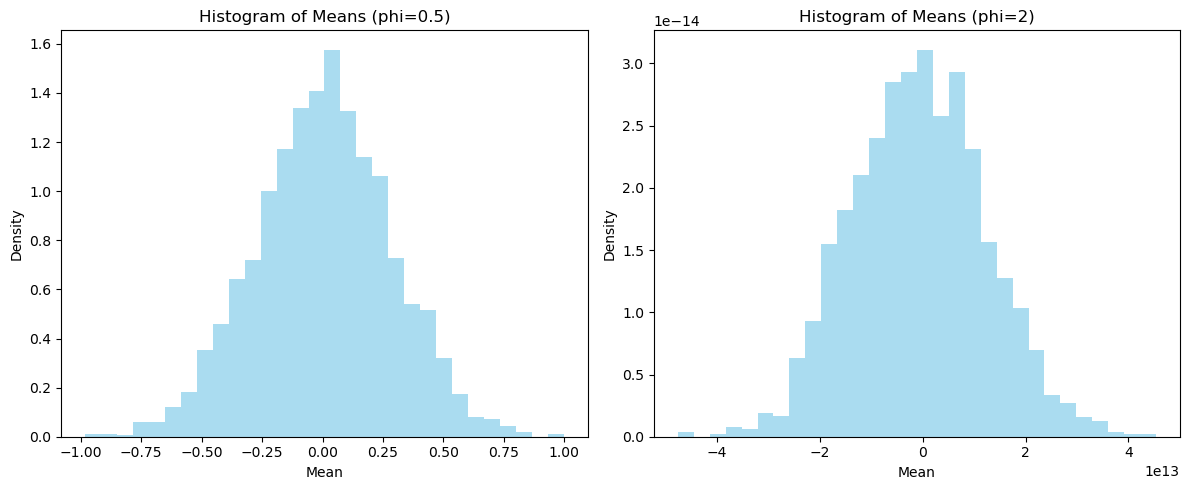

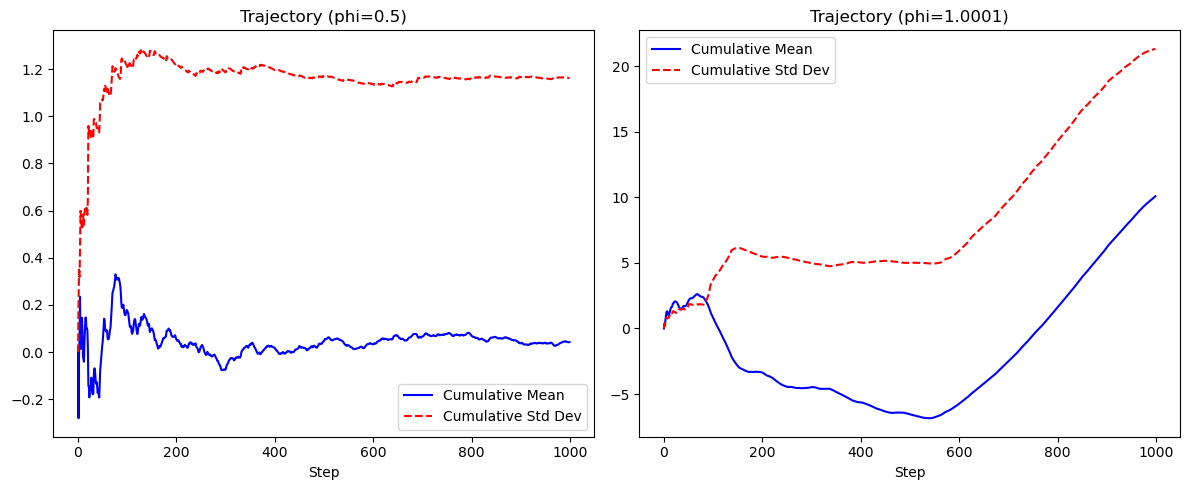

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the AR(1) process
phi_values = [0.5, 2]  # Different values of phi for ergodic and transient cases
sigma = 1              # Standard deviation of the noise
num_chains = 2500      # Number of chains to simulate
chain_length = 50      # Length of each chain
overall_length = 1000  # For trajectory plot

# Function to simulate an AR(1) chain
def simulate_ar1(phi, length, sigma, start=0):
    chain = [start]
    for _ in range(length - 1):
        chain.append(phi * chain[-1] + np.random.normal(0, sigma))
    return np.array(chain)

# Simulate and plot histograms of means
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, phi in enumerate(phi_values):
    means = [np.mean(simulate_ar1(phi, chain_length, sigma)) for _ in range(num_chains)]
    axes[i].hist(means, bins=30, density=True, alpha=0.7, color='skyblue')
    axes[i].set_title(f"Histogram of Means (phi={phi})")
    axes[i].set_xlabel("Mean")
    axes[i].set_ylabel("Density")
plt.tight_layout()
plt.show()

# Plot trajectories of cumulative mean and standard deviation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, phi in enumerate([0.5, 1.0001]):  # Ergodic and barely transient cases
    chain = simulate_ar1(phi, overall_length, sigma)
    cumulative_mean = np.cumsum(chain) / np.arange(1, overall_length + 1)
    cumulative_std = np.sqrt(np.cumsum((chain - cumulative_mean) ** 2) / np.arange(1, overall_length + 1))
    
    axes[i].plot(cumulative_mean, label="Cumulative Mean", color='blue')
    axes[i].plot(cumulative_std, label="Cumulative Std Dev", color='red', linestyle='--')
    axes[i].set_title(f"Trajectory (phi={phi})")
    axes[i].set_xlabel("Step")
    axes[i].legend()
plt.tight_layout()
plt.show()


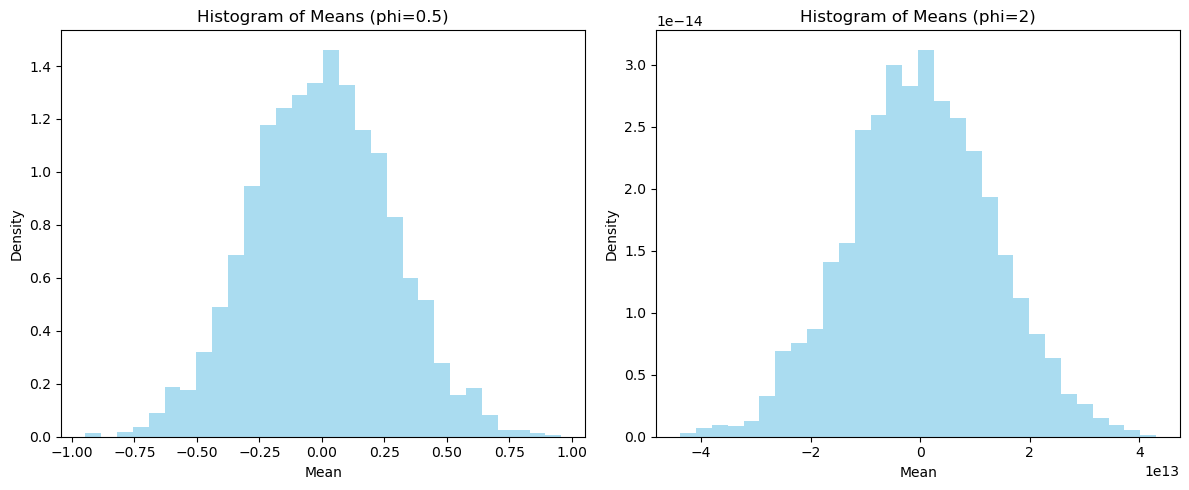

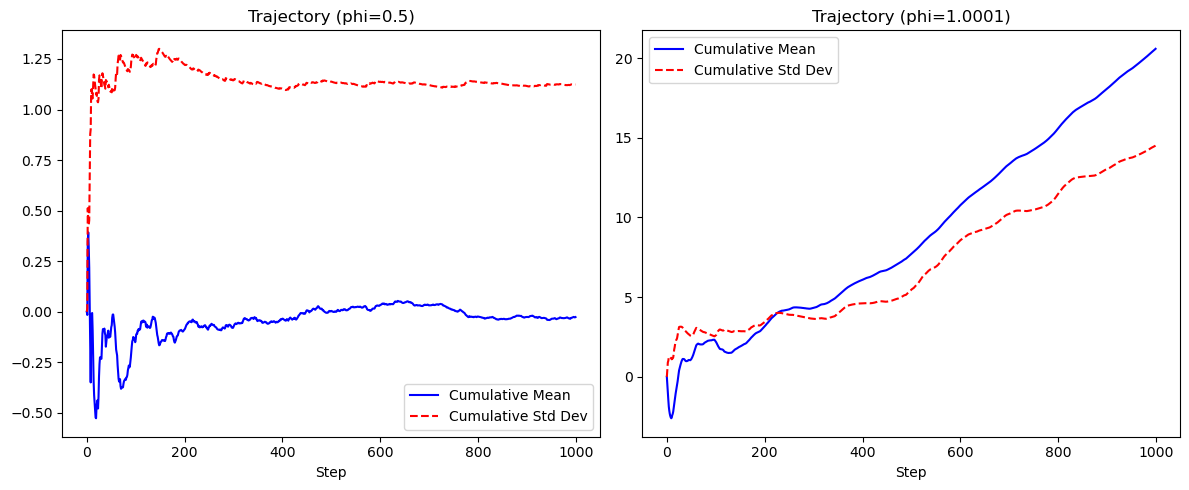

In [2]:
import random
import matplotlib.pyplot as plt

# Parameters for the AR(1) process
phi_values = [0.5, 2]  # Different values of phi for ergodic and transient cases
sigma = 1              # Standard deviation of the noise
num_chains = 2500      # Number of chains to simulate
chain_length = 50      # Length of each chain
overall_length = 1000  # For trajectory plot

# Function to simulate an AR(1) chain
def simulate_ar1(phi, length, sigma, start=0):
    chain = [start]
    for _ in range(length - 1):
        noise = random.gauss(0, sigma)  # Generate Gaussian noise
        chain.append(phi * chain[-1] + noise)
    return chain

# Function to calculate cumulative mean and standard deviation
def cumulative_stats(chain):
    cumulative_mean = []
    cumulative_std = []
    for i in range(1, len(chain) + 1):
        sub_chain = chain[:i]
        mean = sum(sub_chain) / i
        variance = sum((x - mean) ** 2 for x in sub_chain) / i
        cumulative_mean.append(mean)
        cumulative_std.append(variance ** 0.5)
    return cumulative_mean, cumulative_std

# Simulate and plot histograms of means
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, phi in enumerate(phi_values):
    means = [sum(simulate_ar1(phi, chain_length, sigma)) / chain_length for _ in range(num_chains)]
    axes[i].hist(means, bins=30, density=True, alpha=0.7, color='skyblue')
    axes[i].set_title(f"Histogram of Means (phi={phi})")
    axes[i].set_xlabel("Mean")
    axes[i].set_ylabel("Density")
plt.tight_layout()
plt.show()

# Plot trajectories of cumulative mean and standard deviation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, phi in enumerate([0.5, 1.0001]):  # Ergodic and barely transient cases
    chain = simulate_ar1(phi, overall_length, sigma)
    cumulative_mean, cumulative_std = cumulative_stats(chain)
    
    axes[i].plot(cumulative_mean, label="Cumulative Mean", color='blue')
    axes[i].plot(cumulative_std, label="Cumulative Std Dev", color='red', linestyle='--')
    axes[i].set_title(f"Trajectory (phi={phi})")
    axes[i].set_xlabel("Step")
    axes[i].legend()
plt.tight_layout()
plt.show()


## Regeneration and the Central Limit Theorem

### Key Assumptions
If 
$$
E^*[h(X)^{2+\epsilon}] < \infty
$$
for some $\epsilon > 0$, then:
$$
\sqrt{n} \left( \frac{S_n(h)}{n} - E^*[h(X)] \right) \xrightarrow{d} N(0, \sigma^2),
$$
where $\sigma^2$ is defined as in **Theorem 65**.

---

### Regeneration Framework
When a **minorization condition** (as discussed in Sections 6.3.2 and 6.5.2) holds, we can introduce regeneration times. Specifically, there exists a function $0 < \delta(z) < 1$ and a probability measure $Q$ such that, for all $z \in \mathcal{X}$ and all measurable sets $A$,
$$
P(x, A) \geq \delta(x) Q(A).
$$

Using regeneration, we write $S_n(h)$ in terms of **regeneration times**:
$$
T = \{\tau_0 = 0 < \tau_1 < \tau_2 < \cdots\},
$$
where $\tau_k$ are regeneration times of the Markov chain $(X_n)$. If the chain starts at $X_0$ and is stopped after the $T$-th regeneration, then:
$$
S_T(h) = \sum_{t=1}^{T-1} h(X_t),
$$
where the partial sums $S_t$ from **Theorem .63** are i.i.d.

---

### Inter-Regeneration Lengths
Let the **inter-regeneration lengths** be defined as:
$$
N_k = \tau_k - \tau_{k-1}.
$$

For $T$ regenerations, we have:
$$
\frac{S_T}{T} = \frac{1}{T} \sum_{j=0}^{T-1} S_j.
$$

By the **Ergodic Theorem (Theorem 6.63)**, $S_T / T$ converges almost surely to $E^*[h(X)]$ as $T \to \infty$. Additionally, $\tau_T \to \infty$ almost surely.

By **Theorem .37**, the expected inter-regeneration length satisfies:
$$
E^*[N_1] = \frac{1}{E^*[\delta(X)]},
$$
which is assumed finite.

From the **Strong Law of Large Numbers**, $N_T$ converges almost surely to $E^*[N]$. Combined with the above, this implies:
$$
S_T \xrightarrow{a.s.} E^*[N]E^*[h(X)].
$$

---

### Random Variables and Theorem
The random variables:
$$
S_t - N_t E^*[h(X)]
$$
are i.i.d. and centered. 

---

### Theorem 68
If $E^*[S_1^2] < \infty$ and $E^*[N_1^2] < \infty$, the **Central Limit Theorem** applies:
$$
\sqrt{T} \left( \frac{S_T}{T} - E^*[h(X)] \right) \xrightarrow{d} N(0, \sigma^2),
$$
where:
$$
\sigma^2 = \text{Var}(S_1 - N_1 E^*[h(X)]).
$$
## Central Limit Theorem for Regeneration

If:
$$
\sqrt{n} \left( h_n - E^*[h(X)] \right) \xrightarrow{d} N(0, \sigma^2),
$$
then:
$$
\sigma^2 = \frac{E^*[(S_1 - N_1 E^*[h(X)])^2]}{(E^*[N_1])^2}.
$$

### Key Observations
While expressions (6.33) and (6.36) appear similar, the regeneration-based approach has a significant advantage: the variance $\sigma^2$ can be estimated much more easily due to the underlying independence of the regeneration intervals.

For example, the following is a consistent estimator of \(\sigma^2\):
$$
\hat{\sigma}^2 = \frac{\sum (S_t - N_t E^*[h(X)])^2}{T N^2}.
$$

### Minimal Conditions
The conditions on $E^*[S_1^2]$ and $E^*[N_1^2]$ in Theorem 6.68 are minimal and hold whenever the conditions of Theorem .67 are satisfied. For a detailed proof, refer to Hobert et al. (2002).

---

## Problems

### Problem .1
Examine whether a Markov chain $(X_n)$ may always be represented by the deterministic transform $X_n = f(X_{n-1}, \epsilon_n)$, where $(\epsilon_n)$ is a sequence of i.i.d. random variables.

*Hint*: Consider that $(\epsilon_n)$ can be of infinite dimension.

---

### Problem 2
Show that if $(X_n)$ is a time-homogeneous Markov chain, the transition kernel does not depend on $n$. In particular, if the Markov chain has a finite state-space, the transition matrix is constant.

---

### Problem .3
Show that an ARMA($p, q$) model, defined by:
$$
X_n = \sum_{i=1}^p \alpha_i X_{n-i} + \sum_{j=1}^q \phi_j \epsilon_{n-j} + \epsilon_n,
$$
does not produce a Markov chain.

*Hint*: Examine the relation with an AR($q$) process through the decomposition:
$$
Z_n = \sum_{i=1}^p \alpha_i Z_{n-i} + \epsilon_n, \quad Y_n = \sum_{j=1}^q \phi_j Z_{n-j} + \epsilon_n,
$$
since $(Y_n)$ and $(X_n)$ are identically distributed.

---

### Problem .4
Show that the resolvent kernel in **Definition 6.8** is indeed a valid kernel.

---

### Problem .5
Prove that the properties of the resolvent kernel are preserved if the geometric distribution $Geo(\epsilon)$ is replaced by a Poisson distribution $P(\lambda)$ with an arbitrary parameter $\lambda$.

---

### Problem .6
Derive the **strong Markov property** from the decomposition:
$$
E[h(X_{n+1}, X_{n+2}) | X_n, X_{n-1}, \ldots] = E[h(X_{n+1}) | X_n],
$$
and from the **weak Markov property**.
## Notes on Drift Conditions

### Definition of Drift
Meyn and Tweedie (1993) introduced **drift criteria** as a tool to establish various stability results, inspired by Lyapunov's methods. For a function \(V\) on $\mathcal{X}$, the drift of $V$ is defined as:
$$
\Delta V(x) = \int V(y) P(x, dy) - V(x).
$$

Functions \(V\) used in this context are often referred to as **potentials** (see Norris 1997). Drift conditions are widely used to verify convergence properties of MCMC algorithms, such as in **Theorem 7.15** or the work of Mengersen and Tweedie (1996).

---

### Lemma 6.70: Drift and Recurrence
For $C \in \mathcal{B}(\mathcal{X})$, the smallest positive function $V^*$ satisfying the conditions:
$$
\Delta V(x) \leq 0 \quad \text{if } x \notin C, \quad V(x) \geq 1 \quad \text{if } x \in C,
$$
is given by:
$$
V^*(x) = P_x(\tau_C < \infty),
$$
where:
$$
\tau_C = \inf\{n > 0 : X_n \in C\}.
$$

**Notes**:
- If $x \in C$, then $\tau_C = 0$.
- If $x \notin C$, then $\tau_C > 0$.

---

### Theorem .71: Necessary and Sufficient Condition for Transience
The $\nu$-irreducible Markov chain $(X_n)$ is **transient** if and only if there exists a bounded, positive function $V$ and a real number $r \geq 0$ such that for every $x \in \mathcal{X}$ with $V(x) > r$:
$$
\Delta V(x) > 0.
$$


In [3]:
class MarkovChain:
    def __init__(self, transition_kernel, state_space):
        """
        Initialize the Markov Chain.
        
        Parameters:
        - transition_kernel: Function that takes (current_state, next_state) and returns transition probability.
        - state_space: A list of possible states.
        """
        self.transition_kernel = transition_kernel
        self.state_space = state_space

    def drift(self, V, state):
        """
        Compute the drift ΔV(x) = Σ [V(y) * P(x, y)] - V(x).
        
        Parameters:
        - V: Function representing the potential function V(x).
        - state: The current state x.
        
        Returns:
        - Drift value for the given state.
        """
        drift_value = -V(state)  # Start with -V(x)
        for next_state in self.state_space:
            drift_value += V(next_state) * self.transition_kernel(state, next_state)
        return drift_value

    def check_transience(self, V, threshold):
        """
        Check the transience condition: ΔV(x) > 0 for states where V(x) > threshold.
        
        Parameters:
        - V: Function representing the potential function V(x).
        - threshold: The threshold value r.
        
        Returns:
        - List of states where the drift condition holds.
        """
        transient_states = []
        for state in self.state_space:
            if V(state) > threshold and self.drift(V, state) > 0:
                transient_states.append(state)
        return transient_states


# Example Usage

# Define a transition kernel for a simple Markov chain
def transition_kernel(x, y):
    """
    Example transition kernel for a chain on states {0, 1, 2}.
    """
    transitions = {
        0: {0: 0.5, 1: 0.5, 2: 0.0},
        1: {0: 0.2, 1: 0.5, 2: 0.3},
        2: {0: 0.0, 1: 0.4, 2: 0.6},
    }
    return transitions.get(x, {}).get(y, 0.0)

# Define a potential function V(x)
def V(x):
    """
    Example potential function.
    """
    return 2 * x + 1

# Define the state space
state_space = [0, 1, 2]

# Initialize the Markov chain
mc = MarkovChain(transition_kernel, state_space)

# Check drift conditions and transience
threshold = 2
print("State Drift Values:")
for state in state_space:
    print(f"ΔV({state}) = {mc.drift(V, state)}")

transient_states = mc.check_transience(V, threshold)
print(f"Transient states with V(x) > {threshold}: {transient_states}")


State Drift Values:
ΔV(0) = 1.0
ΔV(1) = 0.20000000000000018
ΔV(2) = -0.7999999999999998
Transient states with V(x) > 2: [1]


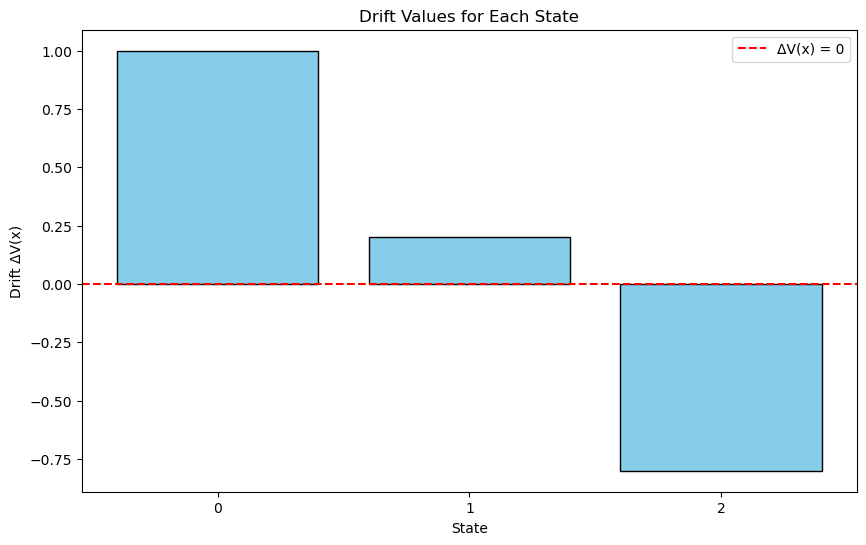

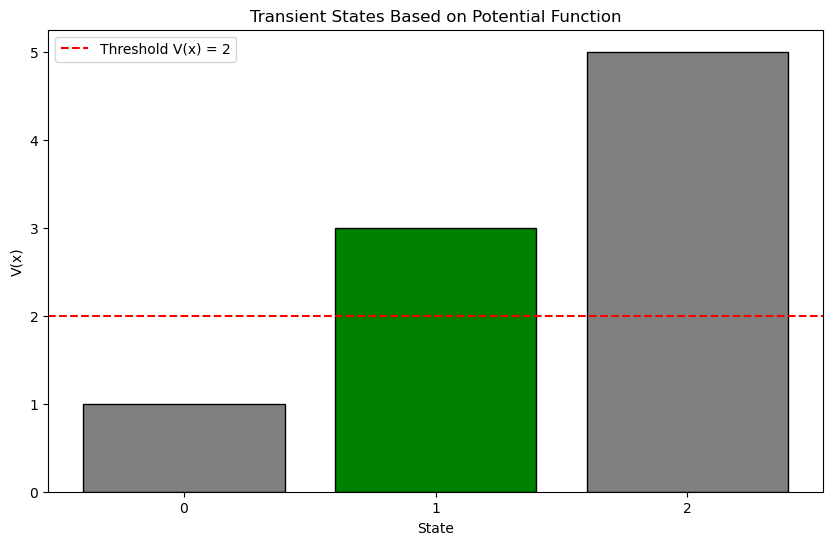

In [4]:
import matplotlib.pyplot as plt

class MarkovChain:
    def __init__(self, transition_kernel, state_space):
        """
        Initialize the Markov Chain.
        
        Parameters:
        - transition_kernel: Function that takes (current_state, next_state) and returns transition probability.
        - state_space: A list of possible states.
        """
        self.transition_kernel = transition_kernel
        self.state_space = state_space

    def drift(self, V, state):
        """
        Compute the drift ΔV(x) = Σ [V(y) * P(x, y)] - V(x).
        
        Parameters:
        - V: Function representing the potential function V(x).
        - state: The current state x.
        
        Returns:
        - Drift value for the given state.
        """
        drift_value = -V(state)  # Start with -V(x)
        for next_state in self.state_space:
            drift_value += V(next_state) * self.transition_kernel(state, next_state)
        return drift_value

    def check_transience(self, V, threshold):
        """
        Check the transience condition: ΔV(x) > 0 for states where V(x) > threshold.
        
        Parameters:
        - V: Function representing the potential function V(x).
        - threshold: The threshold value r.
        
        Returns:
        - List of states where the drift condition holds.
        """
        transient_states = []
        for state in self.state_space:
            if V(state) > threshold and self.drift(V, state) > 0:
                transient_states.append(state)
        return transient_states


# Define a transition kernel for a simple Markov chain
def transition_kernel(x, y):
    """
    Example transition kernel for a chain on states {0, 1, 2}.
    """
    transitions = {
        0: {0: 0.5, 1: 0.5, 2: 0.0},
        1: {0: 0.2, 1: 0.5, 2: 0.3},
        2: {0: 0.0, 1: 0.4, 2: 0.6},
    }
    return transitions.get(x, {}).get(y, 0.0)

# Define a potential function V(x)
def V(x):
    """
    Example potential function.
    """
    return 2 * x + 1

# Define the state space
state_space = [0, 1, 2]

# Initialize the Markov chain
mc = MarkovChain(transition_kernel, state_space)

# Compute drift values
drift_values = [mc.drift(V, state) for state in state_space]

# Identify transient states
threshold = 2
transient_states = mc.check_transience(V, threshold)

# Plot the drift values
plt.figure(figsize=(10, 6))
plt.bar(state_space, drift_values, color='skyblue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', label='ΔV(x) = 0')
plt.title('Drift Values for Each State')
plt.xlabel('State')
plt.ylabel('Drift ΔV(x)')
plt.xticks(state_space)
plt.legend()
plt.show()

# Plot transient states
plt.figure(figsize=(10, 6))
state_colors = ['green' if state in transient_states else 'gray' for state in state_space]
plt.bar(state_space, [V(state) for state in state_space], color=state_colors, edgecolor='black')
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold V(x) = {threshold}')
plt.title('Transient States Based on Potential Function')
plt.xlabel('State')
plt.ylabel('V(x)')
plt.xticks(state_space)
plt.legend()
plt.show()


### Proof

If $ C = \{x \mid V(x) \leq r\} $ and $ M $ is a bound on $ V $, the conditions (6.38) are satisfied by

$$
V^*(x) = 
\begin{cases} 
\frac{M - V(x)}{M - r} & \text{if } x \in C \\
0 & \text{if } x \notin C
\end{cases}
$$

Since $ V(x) < 1 $ for $ x \in C $, $ V^*(x) = P(T_C < \infty) < 1 $ on $ C $, and this implies the transience of $ C $, therefore the transience of $ (X) $. The converse can be deduced from a (partial) converse to Proposition 6.31 (see Meyn and Tweedie 1993, p. 190).

Condition (6.39) describes an average increase of $ V(z) $ once a certain level has been attained, and therefore does not allow a sure return to 0 of $ V $. The condition is thus incompatible with the stability associated with recurrence. On the other hand, if there exists a potential function $ V $ "attracted" to 0, the chain is recurrent.

### Theorem .72

Consider $ (X_n) $, a $ \nu $-irreducible Markov chain. If there exist a small set $ C $ and a function $ V $ such that

$$
C_v(n) = \{x \mid V(x) \leq n\}
$$

is a small set for every $ n $, the chain is recurrent if

$$
A V(z) \geq 0 \text{ on } C.
$$

The fact that $ C_v(n) $ is small means that the function $ V $ is not bounded outside small sets. The attraction of the chain toward smaller values of $ V $ on the sets where $ V $ is large is thus a guarantee of stability for the chain. The proof of the above result is, again, quite involved, based on the fact that $ P(T_C < \infty) = 1 $ (see Meyn and Tweedie 1993, p. 191).

### Example .73 (Continuation of Example .39)

If the distribution of $ W_n $ has a finite support and zero expectation, $ (X) $ is recurrent. When considering $ V(x) = |x| $ and $ r $ such that $ V(x) \leq r $ for $ x > r $, we get

$$
A V(x) = (x + n - |x|),
$$

which is equal to

$$
\sum_{n} \text{even if } r
$$

and

$$
\sum_{n} \text{if } x > r.
$$

Therefore, $ A V(x) = 0 $ for $ x \in \{-r + 1, \dots, r - 1\} $, which is a small set. Conversely, if $ W_1 $ has a nonzero mean, $ X_n $ is transient.

### Theorem .74

If $ (X) $ is Harris recurrent with an invariant measure, there is equivalence between:

- $ \pi $ is finite;
(b) There exist a small set $ C $ and a positive number $ M_c $ such that

$$
\sup_{x \in C} E_x [T_C] < M_c.
$$

(c) There exist a small set $ C $, a function $ V $ taking values in $ \mathbb{R}_+ \cup \{ \infty \} $, and a positive real number $ b $ such that

$$
A V(x) < -1 + b \ell(x).
$$

See Meyn and Tweedie (1993, Chapter 11) for a proof and discussion of these equivalences. (If there exists $ V $ finite and bounded on $ C $ which satisfies (6.40), the chain $ (X) $ is necessarily Harris positive.)

The notion of a Kendall atom introduced in Section 6.6.2 can also be extended to non-atomic chains by defining Kendall sets as sets $ A $ such that

$$
\sup_{x \in A} E_x [T_A] < \infty.
$$

The existence of a Kendall set guarantees a geometric drift condition. If $ C $ is a Kendall set and if the function $ V $ satisfies

$$
V(x) = E_x [T_C],
$$

$$
A V(x) < - G V(x) + b \ell(x),
$$

with $ G > 0 $ and $ 0 < b < \infty $, this condition also guarantees geometric convergence for $ (X) $ in the following way.

### Theorem .75

For a $ \nu $-irreducible and aperiodic chain $ (X) $ and a small Kendall set $ C $, there exist $ R < \infty $ and $ r > 1 $, $ x > 1 $ such that

$$
\sum_{n=1}^{\infty} P(T_C \leq n) \leq R e^{-r n},
$$

for almost every $ x \in X $.

The three conditions (6.41), (6.42), and (6.43) are, in fact, equivalent for $ \nu $-irreducible aperiodic chains if $ A $ is a small set in (6.41) and if $ V $ is bounded from below by 1 in (6.42) (see Meyn and Tweedie 1993, pp. 354-355). The drift condition (6.42) is certainly the simplest to check in practice, even though the potential function $ V $ must be derived.

### Example .76 (Continuation of Example .20)

The condition $ |\theta| < 1 $ is necessary for the chain $ X = 0.1 + \epsilon_n $ to be recurrent. Assume $ \epsilon_n $ has a strictly positive density on $ \mathbb{R} $. Define $ V(x) = |x| + 1 $. Then

$$
E[V(X_1)] = 1 + E[|0X + \epsilon|],
$$

and

$$
V(x) + E[|X|] + 1|X| \leq \cdots
$$
$$
A V(x) \leq (1 - \theta) V(x) + E[|\epsilon_1|] + 1 - |\theta| \leq (1 - \theta) y(x) + E[|\epsilon_1|] + 1 - |\infty| - (1 - \theta)(1 - |\theta|) V(x)
$$
$$
\leq -B V(x) + b \ell(x)
$$
for $ \theta = (1 - \rho), b = E[|\epsilon_1|] + 1 - \rho, $ and $ C = \{ x \mid V(x) < \frac{E[|\epsilon_1|] + 1 - |\theta|}{(1 - \theta)(1 - \rho)} \} $,
if $ |\theta| < 1 $ and $ E[|\epsilon_1|] < \infty $. These conditions thus imply geometric ergodicity for AR(1) models.

Meyn and Tweedie (1994) propose, in addition, explicit evaluations of convergence rates $ r $ as well as explicit bounds $ R $ in connection with drift conditions (6.42), but the geometric convergence is evaluated under a norm induced by the very function $ V $ satisfying (6.42), which makes the result somewhat artificial.

There also is an equivalent form of uniform ergodicity involving drift, namely that $ (X) $ is aperiodic and there exists a small set $ C $, a bounded potential function $ V \geq 1 $, and constants $ 0 < \alpha < \infty $ and $ \delta > 0 $ such that

$$
A V(x) \leq -\delta V(x) + b \ell(x).
$$
In a practical case (see, e.g., Example 12.6), this alternative to the conditions of Theorem 6.59 is often the most natural approach.

As mentioned after Theorem 6.64, there exist alternative versions of the Central Limit Theorem based on drift conditions. Assume that there exist a function $ f \geq 1 $, a finite potential function $ V $, and a small set $ C $ such that

$$
A V(x) \leq f(x) + b \ell(x), \quad \text{for all} \, x \in X,
$$

and that $ E[V^2] < \infty $. This is exactly condition (6.44) above, with $ f = V $, which implies that (6.45) holds for a uniformly ergodic chain.

### Theorem .77
If the ergodic chain $ (X_n) $ with invariant distribution satisfies conditions (6.45), for every function $ g $ such that $ g \leq f $, then

$$
\lim_{n \to \infty} E_x [S_n(g)] = E_g(x_0) + 2 \sum_{n=1}^{\infty} E_x [J(20)(*)].
$$

Here, $ A_1 $ is non-negative and finite. If $ \alpha > 0 $, the Central Limit Theorem holds for $ S_n(g) $. If $ \alpha = 0 $, then $ \sqrt{n} S_n(g) $ almost surely goes to 0.

This theorem is definitely relevant for convergence assessment of Markov Chain Monte Carlo (MCMC) algorithms since, when $ \alpha > 0 $, it is possible to assess the convergence of the ergodic averages $ S_n(g) $ to the quantity of interest $ E^* [g] $. Theorem .77 also suggests how to implement this monitoring through renewal theory, as discussed in detail in Chapter 12.


Drift A V(x): 7.67946587313785e-05
The chain is not geometrically ergodic.


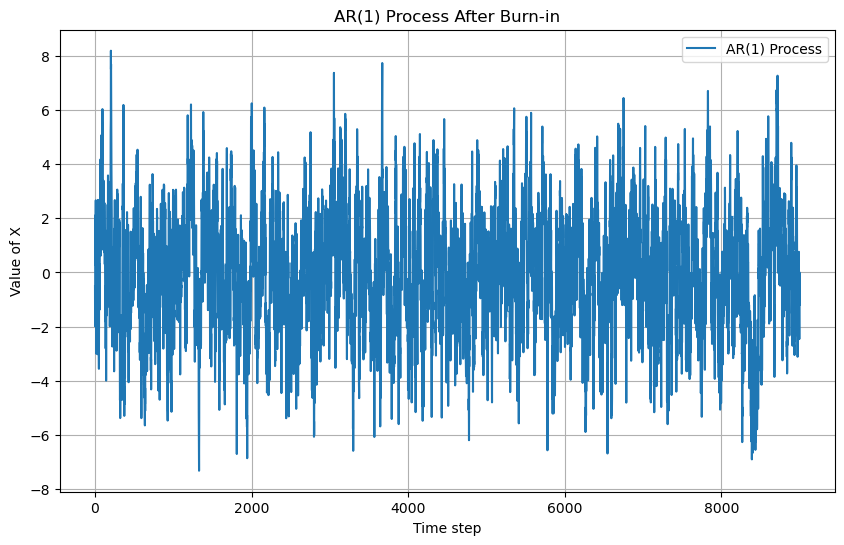

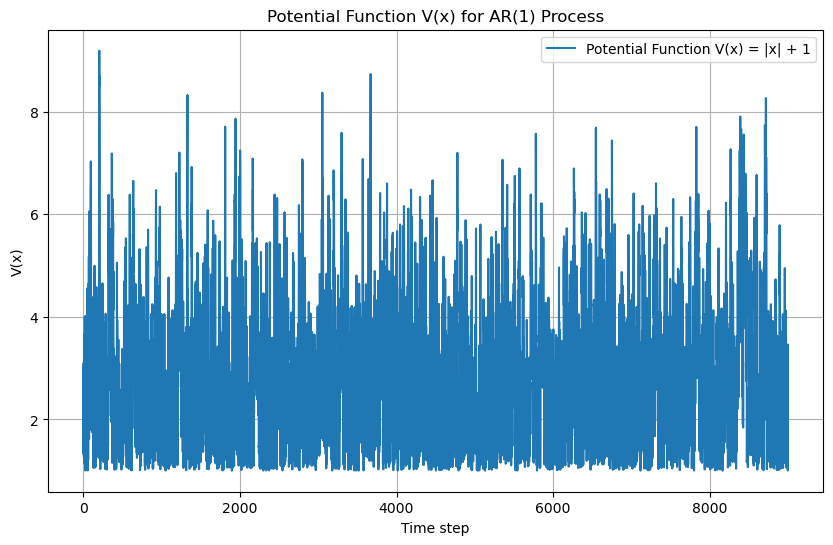

Mean of the chain: -0.07449974303780424
Standard deviation of the chain: 2.2423290210487035


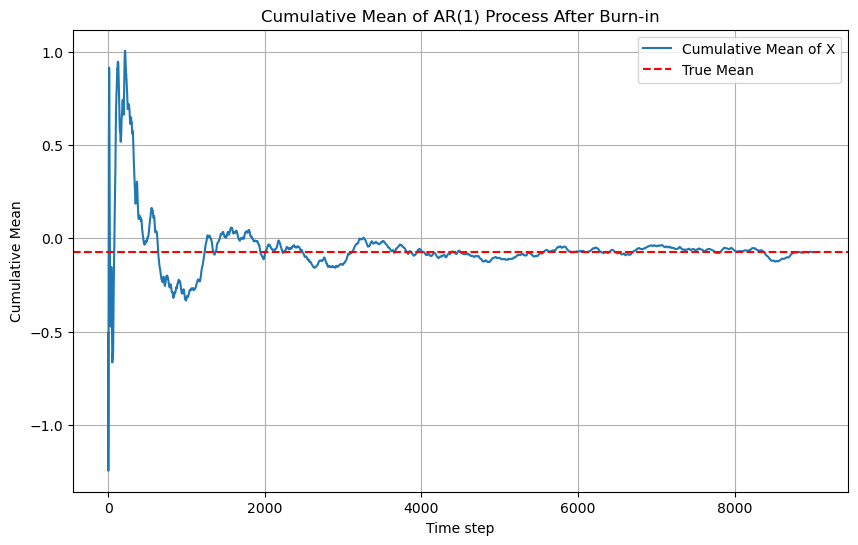

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1) model parameters
alpha = 0.9  # AR coefficient
sigma = 1.0  # Standard deviation of the noise

# Simulation parameters
n_steps = 10000  # Number of steps in the chain
x_init = 0  # Initial value
burn_in = 1000  # Burn-in steps to discard

# Function to simulate the AR(1) process
def ar1_process(alpha, sigma, n_steps, x_init):
    x = np.zeros(n_steps)
    x[0] = x_init
    for t in range(1, n_steps):
        x[t] = alpha * x[t-1] + np.random.normal(0, sigma)
    return x

# Simulate the AR(1) chain
x_chain = ar1_process(alpha, sigma, n_steps, x_init)

# Burn-in to remove transients
x_chain_burned = x_chain[burn_in:]

# Calculate the potential function V(x) = |x| + 1
V = np.abs(x_chain_burned) + 1

# Calculate the drift of V, A V(x) = E[V(X_{n+1})] - V(X_n)
def drift_function(x_chain):
    V_x = np.abs(x_chain) + 1  # Potential function V(x)
    A_V = np.mean(V_x[1:] - V_x[:-1])  # Drift approximation
    return A_V

# Compute drift for the AR(1) chain
A_V = drift_function(x_chain_burned)
print(f"Drift A V(x): {A_V}")

# Geometric ergodicity condition: A_V < 0
if A_V < 0:
    print("The chain is geometrically ergodic.")
else:
    print("The chain is not geometrically ergodic.")

# Plot the AR(1) process
plt.figure(figsize=(10, 6))
plt.plot(x_chain_burned, label="AR(1) Process")
plt.title("AR(1) Process After Burn-in")
plt.xlabel("Time step")
plt.ylabel("Value of X")
plt.legend()
plt.grid(True)
plt.show()

# Plot the potential function V(x)
plt.figure(figsize=(10, 6))
plt.plot(V, label="Potential Function V(x) = |x| + 1")
plt.title("Potential Function V(x) for AR(1) Process")
plt.xlabel("Time step")
plt.ylabel("V(x)")
plt.legend()
plt.grid(True)
plt.show()

# Central Limit Theorem approximation: Calculate the average of the chain and check convergence
avg_value = np.mean(x_chain_burned)
std_dev = np.std(x_chain_burned)

print(f"Mean of the chain: {avg_value}")
print(f"Standard deviation of the chain: {std_dev}")

# Plot the cumulative mean to visualize convergence
cumulative_mean = np.cumsum(x_chain_burned) / np.arange(1, len(x_chain_burned) + 1)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean, label="Cumulative Mean of X")
plt.axhline(avg_value, color="r", linestyle="--", label="True Mean")
plt.title("Cumulative Mean of AR(1) Process After Burn-in")
plt.xlabel("Time step")
plt.ylabel("Cumulative Mean")
plt.legend()
plt.grid(True)
plt.show()
